In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
import warnings

%matplotlib inline
sns.set()

warnings.filterwarnings('ignore')

In [13]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df_used = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [3]:
df_used2 = df_used.copy()

#filling in missing values
columns = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", "GRADES_9_12_G", "GRADES_ALL_G"]

#interpolate missing values
for column in columns:
    df_used2.loc[:, column].fillna(df_used2.loc[:, column].interpolate(), inplace=True)

## 1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

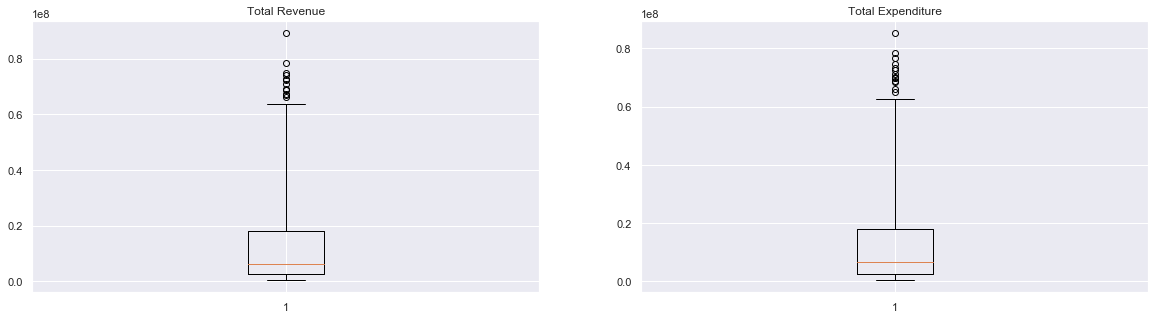

In [11]:
#Display boxplots
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.boxplot(df_used2["TOTAL_REVENUE"], whis = 3)
plt.title("Total Revenue")

plt.subplot(1,2,2)
plt.boxplot(df_used2["TOTAL_EXPENDITURE"], whis = 3)
plt.title("Total Expenditure")
plt.show()

The data show outliers when the whiskers are set to 3, but not when they are set to 5. For this assignment, we will leave the whiskers at 3 to have some outliers to work with.

## 2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

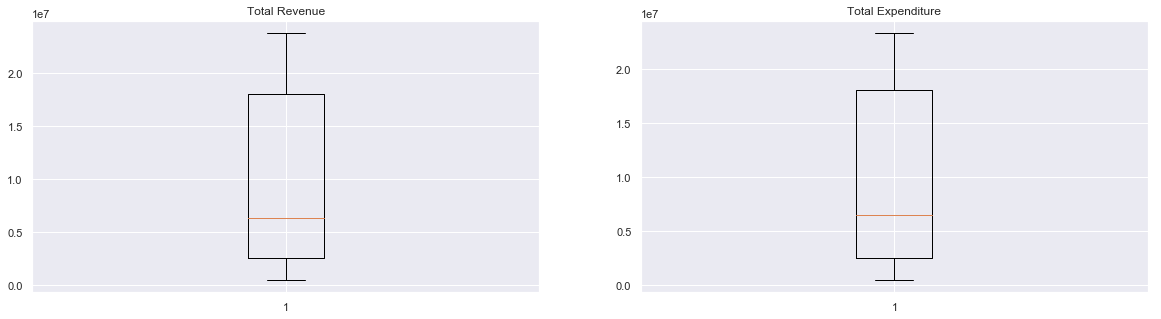

In [15]:
#winsorize data

winsorized_total_revenue = winsorize(df_used2["TOTAL_REVENUE"], (0, 0.1))
winsorized_total_expenditure = winsorize(df_used2["TOTAL_EXPENDITURE"], (0, 0.1))

#Display boxplots
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized_total_revenue, whis = 3)
plt.title("Total Revenue")

plt.subplot(1,2,2)
plt.boxplot(winsorized_total_expenditure, whis = 3)
plt.title("Total Expenditure")
plt.show()

After winsorization, the outliers are eliminated.

## 3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

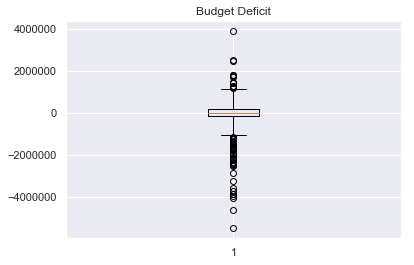

In [19]:
budget_deficit = df_used2["TOTAL_REVENUE"] - df_used2["TOTAL_EXPENDITURE"]

plt.boxplot(budget_deficit, whis = 3)
plt.title("Budget Deficit")
plt.show()

The budget deficit variable shows outliers.  Let's eliminate them with winsorization:

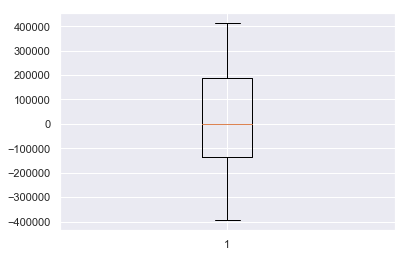

In [20]:
winsorized_budget_deficit = winsorize(budget_deficit, (0.1, 0.1))

plt.boxplot(winsorized_budget_deficit, whis = 3)
plt.show()

The budget deficit variable is now free of outliers.

## 4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

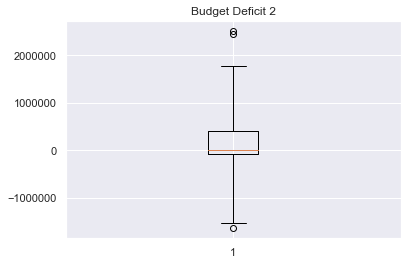

In [22]:
budget_deficit2 = winsorized_total_revenue - winsorized_total_expenditure

plt.boxplot(budget_deficit2, whis = 3)
plt.title("Budget Deficit 2")
plt.show()

There are a few outliers in the new budget deficit variable.  Let's eliminate them:

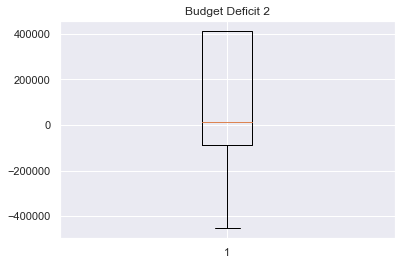

In [23]:
winsorized_budget_deficit2 = winsorize(budget_deficit2, (0.05, 0.05))

plt.boxplot(winsorized_budget_deficit2, whis = 3)
plt.title("Budget Deficit 2")
plt.show()

After winsorization, the outliers are eliminated.

## 5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [25]:
pd.DataFrame({"OG_BUDGET": budget_deficit, "WINSORIZED_BUDGET": winsorized_budget_deficit,
              "WINSORIZED_BUDGET2": winsorized_budget_deficit2}).describe()

,OG_BUDGET,WINSORIZED_BUDGET,WINSORIZED_BUDGET2
count,1.492000e+03,1492.000000,1492.000000
mean,-3.209622e+04,21339.228552,63274.008043
std,5.607748e+05,255382.952779,259123.527230
min,-5.487742e+06,-395270.000000,-454273.000000
25%,-1.368148e+05,-136814.750000,-88881.250000
50%,-5.355000e+02,-535.500000,13343.000000
75%,1.876285e+05,187628.500000,414013.000000
max,3.897129e+06,414013.000000,414013.000000


Several of the crucial statistics are quite different, including the mean and median. 

## 6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

My intuition is that it makes better sense to create a new variable before dealing with outliers, although I am not confident in this.